 **GRIP** (Graduate Rotational Internship Program)- The Sparks Foundation
 Task 2 - Prediction Using Unsupervised ML
 
 **Problem Statement -** From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.
 
 **Theory-**
 
 **Unsupervised Learning:**uses machine learning algorithms to analyze and cluster unlabeled datasets. 
 These algorithms discover hidden patterns or data groupings without the need for human intervention.

 **k-means clustering** is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster.

IMPORTING PACKAGES


In [21]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt


LOADING DATASETS

In [3]:
data=datasets.load_iris()
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

CREATING DATAFRAME


In [4]:
df=pd.DataFrame(data.data,columns=data.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


DESCRIBING DATASET


In [6]:
# Dataset Shape
df.shape

(150, 4)

In [8]:
# Dataset Statistics
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [10]:
#Checking of Null Values
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

IMPLEMENTATION OF UNSUPERVISED LEARNING


In [12]:
# K-means Clustering
from sklearn.cluster import KMeans
x=df.loc[:,:]

IDENTIFICATION THROUGH ELBOW GRAPH


In [19]:
n_range=range(1,10)
inertia=list()
for i in n_range:
  obj=KMeans(n_clusters=i)
  obj.fit_predict(x)
  inertia.append(obj.inertia_)


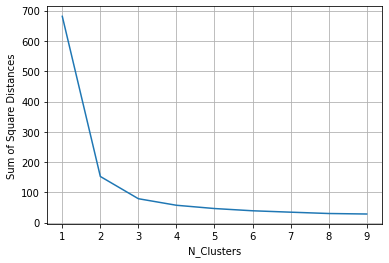

In [24]:
plt.plot(n_range,inertia)
plt.grid()
plt.xlabel("N_Clusters")
plt.ylabel("Sum of Square Distances")
plt.show()

TRAIN THE MODEL


In [25]:
model=KMeans(n_clusters=3,random_state=0)
model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [26]:
output=model.fit_predict(x)

In [27]:
df['cluster']=output
df.head

<bound method NDFrame.head of      sepal length (cm)  sepal width (cm)  ...  petal width (cm)  cluster
0                  5.1               3.5  ...               0.2        1
1                  4.9               3.0  ...               0.2        1
2                  4.7               3.2  ...               0.2        1
3                  4.6               3.1  ...               0.2        1
4                  5.0               3.6  ...               0.2        1
..                 ...               ...  ...               ...      ...
145                6.7               3.0  ...               2.3        0
146                6.3               2.5  ...               1.9        2
147                6.5               3.0  ...               2.0        0
148                6.2               3.4  ...               2.3        0
149                5.9               3.0  ...               1.8        2

[150 rows x 5 columns]>

CLUSTER VISUALIZATION


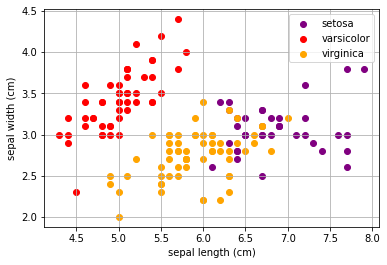

In [29]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='purple',label='setosa')
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color='red',label='varsicolor')
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color='orange',label='virginica')
plt.xlabel("sepal length (cm)")
plt.legend()
plt.ylabel("sepal width (cm)")
plt.grid()
plt.show()